In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from embedding_functions import *
from experiment_setup import *
from functions_for_bootstrap import *
import numba as nb
from scipy.stats import wasserstein_distance
from tqdm import tqdm
import random

In [56]:
"""SBM network via a Poisson """
'''I really don't know if this follows the model of RDPG land but I can check - i think it is still a 2 comm SBM'''
# Network generation --------------------------------------------------------
random.seed(100)

n = 300  # number of nodes
K = 2     # number of node communities

# Community labels
tau = np.random.choice(K, n) # order tau would make the nice blocks
tau = np.sort(tau)
# print(tau)

# Generate stochastic block model (SBM) B matrix
"""Just one observation is required"""
B_list = []
B_list.append(np.array([[4 , 2], [3, 7]]))

In [57]:
# Generate adjacency matrix from the B matrix
As = np.zeros((n, n))
P_list = []

In [58]:
random.seed(10)

# Get probability matrix from B
P_t = np.column_stack(
    [B_list[0][tau, tau[i]] for i in range(n)])
P_list.append(P_t)

# Generate random graph from the P matrix
"""Have modified this to be a draw from a Poisson"""
A_t = np.random.poisson(lam=P_t)
# turn to integer from float
A_t = A_t.astype(int)
As = A_t

As = As.astype(int)
P = np.column_stack(P_list)

A_obs = As

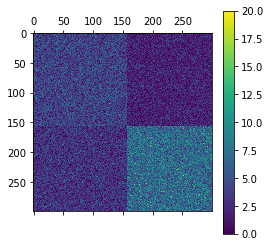

In [59]:
# Sample drawn using the above P - this is the Observed A matrix
cax = plt.matshow(As)
plt.colorbar(cax)
plt.show()

In [64]:
d=2
n_neighbors=1
B = 100

n = A_obs.shape[0]
A = A_obs.copy()
A = A.astype(float)

In [61]:
# Embed the graphs -------------------------------  
yhat = UASE([A], d=d, flat=True)

# run a k-NN on the embedding yhat
# Here we use Minkowski distance, with p=2 (these are the defaults), 
# which corresponds to Euclidean distance
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree', metric='minkowski', p=2).fit(yhat)
distances, indices = nbrs.kneighbors(yhat)

# Estimate the weighted P from A_obs -------------------------------
P_est = P_est_from_A_obs(n, A, n_neighbors=n_neighbors, indices=indices)

# Bootstrap -----------------------------------------
# B = 100
p_vals = []
A_boots = []
for i in range(B):
    A_est = np.random.poisson(lam=P_est)
    A_est = A_est.astype(float)

    yhat_est = UASE([A_obs,A_est], d=d)
    p_val = test_temporal_displacement_two_times(yhat_est, n)
    p_vals.append(p_val)
    A_boots.append(A_est)

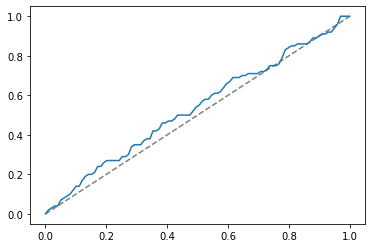

0.07

In [62]:
plot_power(p_vals, plot=True)

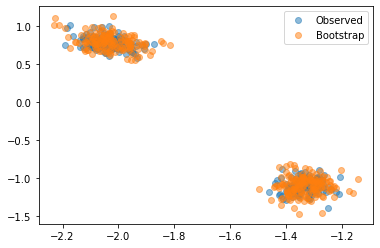

In [63]:
yhat_est = UASE([A_obs,A_est], d=K, flat=False)

plt.plot(yhat_est[0, :, 0], yhat_est[0, :, 1], 'o', label="Observed", alpha=0.5)
plt.plot(yhat_est[1, :, 0], yhat_est[1, :, 1], 'o', label="Bootstrap", alpha=0.5)

plt.legend()

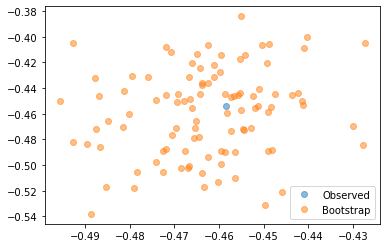

In [35]:
# append A_obs to the front of A_boots list
mats = [A_obs] + A_boots
# embed the whole thing
yhat_est = UASE(mats, d=K, flat=False)

# this plots the position of node i for the observed and all the bootstraps
i=2 # node index
plt.plot(yhat_est[0, i, 0], yhat_est[0, i, 1], 'o', label="Observed", alpha=0.5)
plt.plot(yhat_est[1:, i, 0], yhat_est[1:, i, 1], 'o', label="Bootstrap", alpha=0.5)

plt.legend()

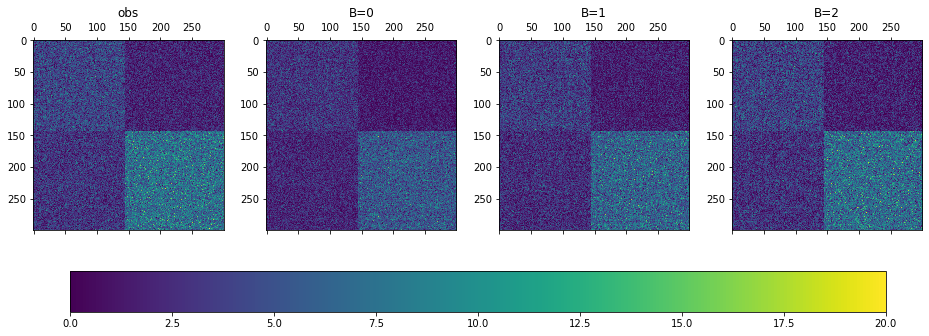

In [36]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, figsize=(16,5))

# fig.suptitle('Heatmaps of the `A` matrices which have SBM format of 2 communities', fontsize=12)

ax0.set_title('obs')
ax0.matshow(A_obs)
ax1.set_title('B=0')
ax1.matshow(A_boots[0])
ax2.set_title('B=1')
ax2.matshow(A_boots[1])
ax3.set_title('B=2')
ax3.matshow(A_boots[2])

# add the colourbar
fig.colorbar(cax, ax=[ax0, ax1, ax2, ax3], orientation='horizontal')

In [ ]:
# Generate adjacency matrix from the B matrix
As = np.zeros((n, n))
P_list = []

In [ ]:
random.seed(10)

# Get probability matrix from B
P_t = np.column_stack(
    [B_list[0][tau, tau[i]] for i in range(n)])
P_list.append(P_t)

# Generate random graph from the P matrix
"""Have modified this to be a draw from a Poisson"""
A_t = np.random.poisson(lam=P_t)
# turn to integer from float
A_t = A_t.astype(int)
As = A_t

As = As.astype(int)
P = np.column_stack(P_list)

A_obs = As

### Completely random Poission lambda values

In [40]:
# Network generation --------------------------------------------------------
random.seed(100)

n = 300  # number of nodes

# random matrix of lambda values (from an exponential distribution)
mean = 0
gamma = 1
np.random.seed(0)
P = np.random.exponential(scale=2, size=(n, n))
P.shape

(300, 300)

In [42]:
# Generate adjacency matrix from the B matrix
As = np.zeros((n, n))
random.seed(10)

# Generate random graph from the P matrix
"""Have modified this to be a draw from a Poisson"""
A_t = np.random.poisson(lam=P)
# turn to integer from float
A_t = A_t.astype(int)
As = A_t

As = As.astype(int)

A_obs = As

In [44]:
d=2
n_neighbors=5
B = 100

n = A_obs.shape[0]
A = A_obs.copy()
A = A.astype(float)

In [45]:
# Embed the graphs -------------------------------  
yhat = UASE([A], d=d, flat=True)

# run a k-NN on the embedding yhat
# Here we use Minkowski distance, with p=2 (these are the defaults), 
# which corresponds to Euclidean distance
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree', metric='minkowski', p=2).fit(yhat)
distances, indices = nbrs.kneighbors(yhat)

# Estimate the weighted P from A_obs -------------------------------
P_est = P_est_from_A_obs(n, A, n_neighbors=n_neighbors, indices=indices)

# Bootstrap -----------------------------------------
# B = 100
p_vals = []
A_boots = []
for i in range(B):
    A_est = np.random.poisson(lam=P_est)
    A_est = A_est.astype(float)

    yhat_est = UASE([A_obs,A_est], d=d)
    p_val = test_temporal_displacement_two_times(yhat_est, n)
    p_vals.append(p_val)
    A_boots.append(A_est)

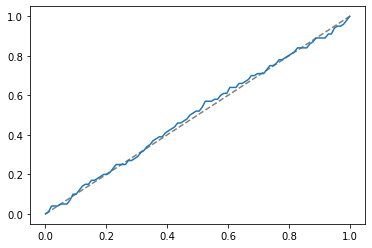

0.05

In [46]:
plot_power(p_vals, plot=True)

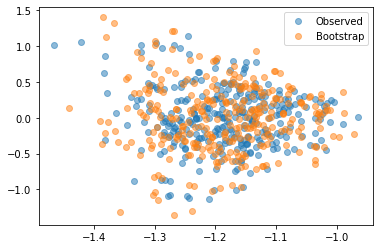

In [47]:
yhat_est = UASE([A_obs,A_est], d=K, flat=False)

plt.plot(yhat_est[0, :, 0], yhat_est[0, :, 1], 'o', label="Observed", alpha=0.5)
plt.plot(yhat_est[1, :, 0], yhat_est[1, :, 1], 'o', label="Bootstrap", alpha=0.5)

plt.legend()

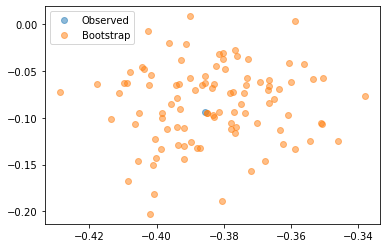

In [54]:
# append A_obs to the front of A_boots list
mats = [A_obs] + A_boots
# embed the whole thing
yhat_est = UASE(mats, d=K, flat=False)

# this plots the position of node i for the observed and all the bootstraps
i=45 # node index
plt.plot(yhat_est[0, i, 0], yhat_est[0, i, 1], 'o', label="Observed", alpha=0.5)
plt.plot(yhat_est[1:, i, 0], yhat_est[1:, i, 1], 'o', label="Bootstrap", alpha=0.5)

plt.legend()

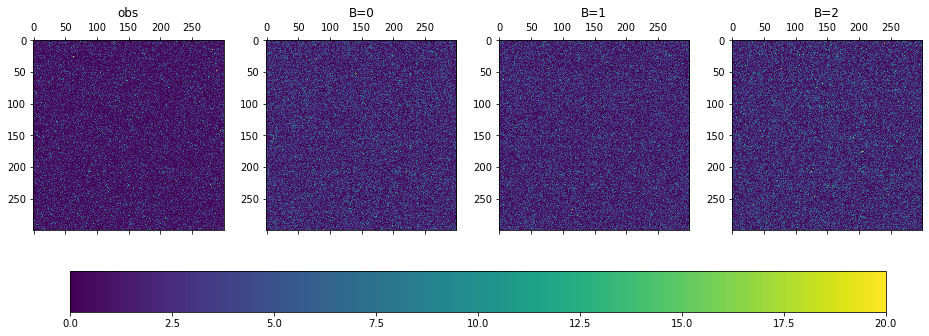

In [49]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, figsize=(16,5))

# fig.suptitle('Heatmaps of the `A` matrices which have SBM format of 2 communities', fontsize=12)

ax0.set_title('obs')
ax0.matshow(A_obs)
ax1.set_title('B=0')
ax1.matshow(A_boots[0])
ax2.set_title('B=1')
ax2.matshow(A_boots[1])
ax3.set_title('B=2')
ax3.matshow(A_boots[2])

# add the colourbar
fig.colorbar(cax, ax=[ax0, ax1, ax2, ax3], orientation='horizontal')